In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [2]:
tel = pd.read_csv('data/tel.csv')
tel

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
## 데이터프레임을 넣고 column별 특성 및 결측값, 고유값들을 확인하는 함수를 작성해본다.
## 필수는 아니지만 전체적인 흐름을 파악하기 쉬워진다.

def resumetable(df):
  print(f'데이터셋 크기: {df.shape}')                                # 데이터프레임의 전체 크기(행, 열) 출력

  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])         # 각 피처의 데이터 타입을 가져와 데이터프레임으로 생성
  summary = summary.reset_index()                                    # 인덱스를 초기화하여 컬럼으로 변환
  summary = summary.rename(columns={'index':'피처'})                 # 'index' 컬럼명을 '피처'로 변경

  summary['결측값 개수'] = df.isnull().sum().values                 # 각 피처의 결측값(null) 개수 계산
  summary['고유값 개수'] = df.nunique().values                      # 각 피처의 고유값 개수 계산

  summary['첫 번째 값'] = df.loc[0].values                          # 각 피처의 첫 번째 샘플 값
  summary['두 번째 값'] = df.loc[1].values                          # 각 피처의 두 번째 샘플 값
  summary['세 번째 값'] = df.loc[2].values                          # 각 피처의 세 번째 샘플 값

  return summary                                                     # 요약 테이블 반환

In [4]:
resumetable(tel)

데이터셋 크기: (7043, 21)


,피처,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,customerID,object,0,7043,7590-VHVEG,5575-GNVDE,3668-QPYBK
1,gender,object,0,2,Female,Male,Male
2,SeniorCitizen,int64,0,2,0,0,0
3,Partner,object,0,2,Yes,No,No
4,Dependents,object,0,2,No,No,No
5,tenure,int64,0,73,1,34,2
6,PhoneService,object,0,2,No,Yes,Yes
7,MultipleLines,object,0,3,No phone service,No,No
8,InternetService,object,0,3,DSL,DSL,DSL
9,OnlineSecurity,object,0,3,No,Yes,Yes


In [5]:
tel = tel.rename(columns={
    'customerID': '고객ID',
    'gender': '성별',
    'SeniorCitizen': '고령자여부',
    'Partner': '배우자여부',
    'Dependents': '부양가족여부',
    'tenure': '가입개월수',
    'PhoneService': '전화서비스가입여부',
    'MultipleLines': '복수회선여부',
    'InternetService': '인터넷서비스유형',
    'OnlineSecurity': '온라인보안서비스여부',
    'OnlineBackup': '온라인백업서비스여부',
    'DeviceProtection': '기기보호서비스여부',
    'TechSupport': '기술지원서비스여부',
    'StreamingTV': 'TV스트리밍이용여부',
    'StreamingMovies': '영화스트리밍이용여부',
    'Contract': '계약기간유형',
    'PaperlessBilling': '전자청구서이용여부',
    'PaymentMethod': '결제방법',
    'MonthlyCharges': '월요금',
    'TotalCharges': '총요금',
    'Churn': '이탈여부'
})

In [6]:
tel['고령자여부'] = tel['고령자여부'].replace({1: 'Yes', 0: 'No'})

In [7]:
tel['인터넷서비스가입여부'] = tel['온라인보안서비스여부'] == 'No internet service'

In [8]:
tel['인터넷서비스가입여부'] = ~tel['인터넷서비스가입여부']

In [9]:
tel.head(20)

,고객ID,성별,고령자여부,배우자여부,부양가족여부,가입개월수,전화서비스가입여부,복수회선여부,인터넷서비스유형,온라인보안서비스여부,...,기술지원서비스여부,TV스트리밍이용여부,영화스트리밍이용여부,계약기간유형,전자청구서이용여부,결제방법,월요금,총요금,이탈여부,인터넷서비스가입여부
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,True
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,True
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,True
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,True
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,True
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,True


In [10]:
tel['복수회선여부'] = tel['복수회선여부'].replace({'No phone service': 'No'})

In [11]:
cols = ['온라인보안서비스여부', '온라인백업서비스여부', '기기보호서비스여부', '기술지원서비스여부',
        'TV스트리밍이용여부', '영화스트리밍이용여부']

tel[cols] = tel[cols].replace('No internet service', 'No')

In [12]:
tel.head(20)

,고객ID,성별,고령자여부,배우자여부,부양가족여부,가입개월수,전화서비스가입여부,복수회선여부,인터넷서비스유형,온라인보안서비스여부,...,기술지원서비스여부,TV스트리밍이용여부,영화스트리밍이용여부,계약기간유형,전자청구서이용여부,결제방법,월요금,총요금,이탈여부,인터넷서비스가입여부
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,True
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,True
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,True
7,6713-OKOMC,Female,No,No,No,10,No,No,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,True
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,True
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,True


In [13]:
resumetable(tel)

데이터셋 크기: (7043, 22)


,피처,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,고객ID,object,0,7043,7590-VHVEG,5575-GNVDE,3668-QPYBK
1,성별,object,0,2,Female,Male,Male
2,고령자여부,object,0,2,No,No,No
3,배우자여부,object,0,2,Yes,No,No
4,부양가족여부,object,0,2,No,No,No
5,가입개월수,int64,0,73,1,34,2
6,전화서비스가입여부,object,0,2,No,Yes,Yes
7,복수회선여부,object,0,2,No,No,No
8,인터넷서비스유형,object,0,3,DSL,DSL,DSL
9,온라인보안서비스여부,object,0,2,No,Yes,Yes


In [14]:
tel.replace({'Yes': True, 'No': False},inplace = True)

C:\Users\win11\AppData\Local\Temp\ipykernel_4544\67169591.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tel.replace({'Yes': True, 'No': False},inplace = True)


In [15]:
tel['성별'] = tel['성별'].replace({'Male': True, 'Female': False})

C:\Users\win11\AppData\Local\Temp\ipykernel_4544\1917428603.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tel['성별'] = tel['성별'].replace({'Male': True, 'Female': False})


In [16]:
tel.head(20)

,고객ID,성별,고령자여부,배우자여부,부양가족여부,가입개월수,전화서비스가입여부,복수회선여부,인터넷서비스유형,온라인보안서비스여부,...,기술지원서비스여부,TV스트리밍이용여부,영화스트리밍이용여부,계약기간유형,전자청구서이용여부,결제방법,월요금,총요금,이탈여부,인터넷서비스가입여부
0,7590-VHVEG,False,False,True,False,1,False,False,DSL,False,...,False,False,False,Month-to-month,True,Electronic check,29.85,29.85,False,True
1,5575-GNVDE,True,False,False,False,34,True,False,DSL,True,...,False,False,False,One year,False,Mailed check,56.95,1889.5,False,True
2,3668-QPYBK,True,False,False,False,2,True,False,DSL,True,...,False,False,False,Month-to-month,True,Mailed check,53.85,108.15,True,True
3,7795-CFOCW,True,False,False,False,45,False,False,DSL,True,...,True,False,False,One year,False,Bank transfer (automatic),42.30,1840.75,False,True
4,9237-HQITU,False,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,Month-to-month,True,Electronic check,70.70,151.65,True,True
5,9305-CDSKC,False,False,False,False,8,True,True,Fiber optic,False,...,False,True,True,Month-to-month,True,Electronic check,99.65,820.5,True,True
6,1452-KIOVK,True,False,False,True,22,True,True,Fiber optic,False,...,False,True,False,Month-to-month,True,Credit card (automatic),89.10,1949.4,False,True
7,6713-OKOMC,False,False,False,False,10,False,False,DSL,True,...,False,False,False,Month-to-month,False,Mailed check,29.75,301.9,False,True
8,7892-POOKP,False,False,True,False,28,True,True,Fiber optic,False,...,True,True,True,Month-to-month,True,Electronic check,104.80,3046.05,True,True
9,6388-TABGU,True,False,False,True,62,True,False,DSL,True,...,False,False,False,One year,False,Bank transfer (automatic),56.15,3487.95,False,True


In [17]:
tel.dtypes

고객ID           object
성별               bool
고령자여부            bool
배우자여부            bool
부양가족여부           bool
가입개월수           int64
전화서비스가입여부        bool
복수회선여부           bool
인터넷서비스유형       object
온라인보안서비스여부       bool
온라인백업서비스여부       bool
기기보호서비스여부        bool
기술지원서비스여부        bool
TV스트리밍이용여부       bool
영화스트리밍이용여부       bool
계약기간유형         object
전자청구서이용여부        bool
결제방법           object
월요금           float64
총요금            object
이탈여부             bool
인터넷서비스가입여부       bool
dtype: object

In [18]:
tel['결제방법'].value_counts()

결제방법
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [19]:
a1 = tel[['배우자여부', '이탈여부']]
a1

,배우자여부,이탈여부
0,True,False
1,False,False
2,False,True
3,False,False
4,False,True
...,...,...
7038,True,False
7039,True,False
7040,True,False
7041,True,True


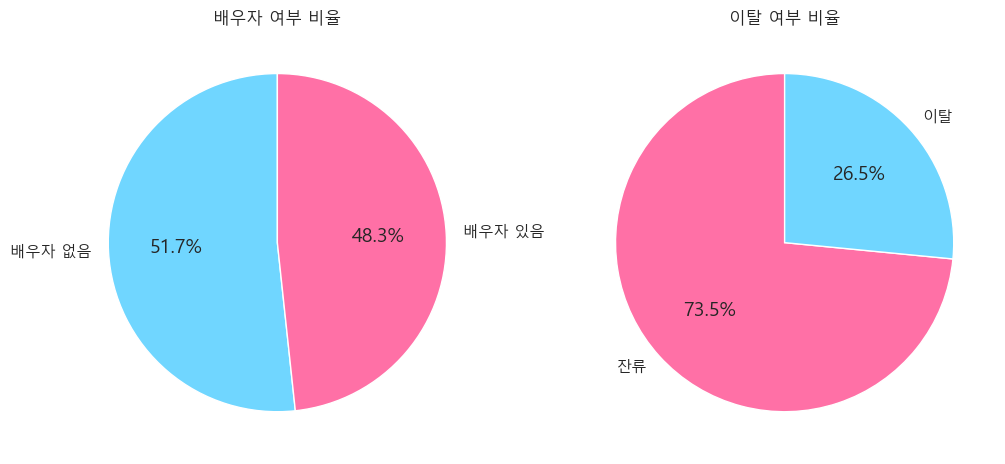

In [20]:
partner = tel['배우자여부'].value_counts()
partner.index = ['배우자 없음', '배우자 있음']
color1 = ['#70d6ff', '#ff70a6']

churn = tel['이탈여부'].value_counts()
churn.index = ['잔류', '이탈']
color2 = ['#ff70a6', '#70d6ff']

# 배우자가 있다, 없다 비율
plt.subplot(1, 2, 1)
plt.pie(
    partner,
    labels=partner.index,
    autopct='%.1f%%',
    startangle=90,
    colors=color1
)
plt.title('배우자 여부 비율')
plt.ylabel('')

# 이탈을 했다, 안했다 비율
plt.subplot(1, 2, 2)
plt.pie(
    churn,
    labels=churn.index,
    autopct='%.1f%%',
    startangle=90,
    colors=color2
)
plt.title('이탈 여부 비율')
plt.ylabel('')

plt.show()

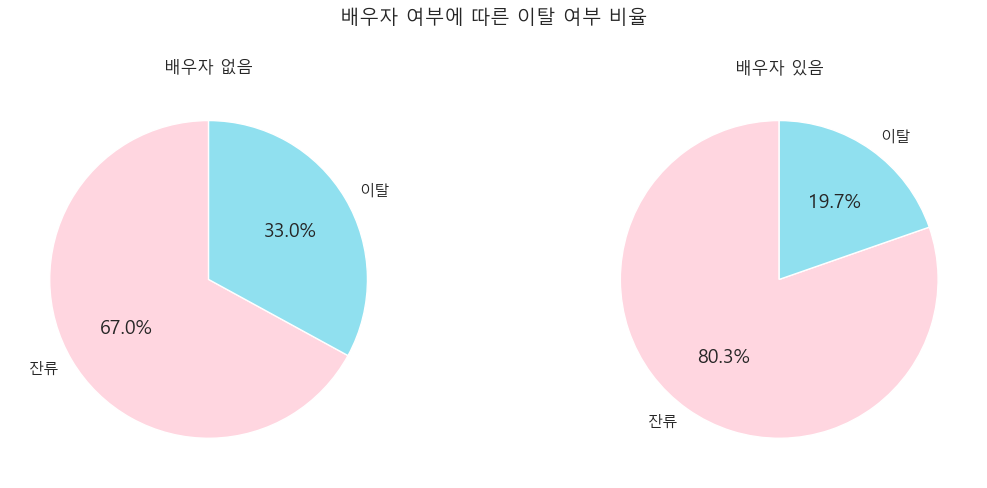

In [21]:
# 교차표 생성
grouped = tel.groupby(['배우자여부', '이탈여부']).size().unstack()

# 색상 지정
colors = ['#ffd6e0', '#90e0ef']  # 잔류, 이탈

# subplot으로 파이차트 2개 그리기
plt.figure(figsize=(12, 5))

# 배우자 없음 (False)
plt.subplot(1, 2, 1)
plt.pie(
    grouped.loc[False],
    labels=['잔류', '이탈'],
    autopct='%.1f%%',
    startangle=90,
    colors=colors
)
plt.title('배우자 없음')
plt.ylabel('')

# 배우자 있음 (True)
plt.subplot(1, 2, 2)
plt.pie(
    grouped.loc[True],
    labels=['잔류', '이탈'],
    autopct='%.1f%%',
    startangle=90,
    colors=colors
)
plt.title('배우자 있음')
plt.ylabel('')

plt.suptitle('배우자 여부에 따른 이탈 여부 비율', fontsize=14)
plt.tight_layout()
plt.show()


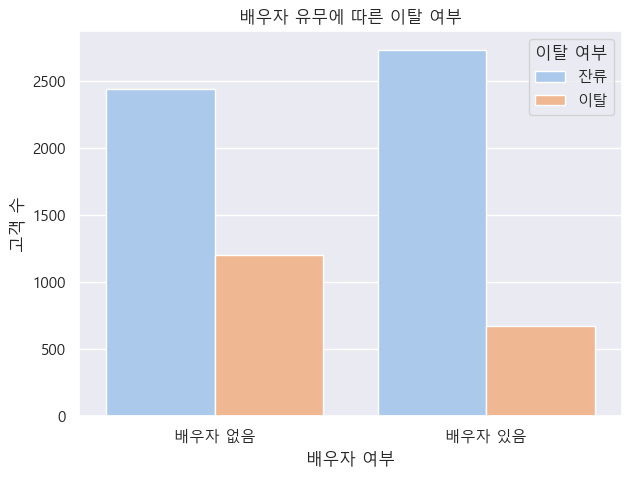

In [22]:
# 배우자 유무에 따른 이탈 여부 (countplot)

plt.figure(figsize=(7,5))

sns.countplot(
    data=tel, 
    x='배우자여부', 
    hue='이탈여부',
    palette='pastel'
)

plt.title('배우자 유무에 따른 이탈 여부')
plt.xticks([0,1], ['배우자 없음', '배우자 있음'])
plt.xlabel('배우자 여부')
plt.ylabel('고객 수')
plt.legend(title='이탈 여부', labels=['잔류','이탈'])
plt.show()

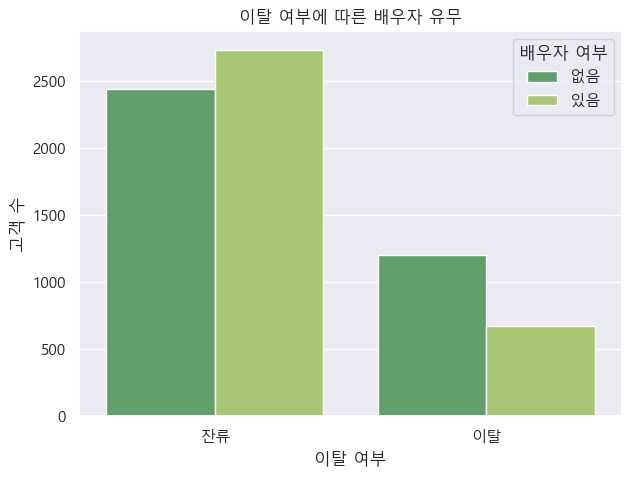

In [23]:
# 이탈 여부에 따른 배우자 유무 (countplot)

plt.figure(figsize=(7,5))

sns.countplot(
    data=tel, 
    x='이탈여부', 
    hue='배우자여부',
    palette='summer',
)

plt.title('이탈 여부에 따른 배우자 유무')
plt.xticks([0,1], ['잔류', '이탈'])
plt.xlabel('이탈 여부')
plt.ylabel('고객 수')
plt.legend(title='배우자 여부', labels=['없음','있음'])
plt.show()

In [24]:
# 인터넷서비스유형에 따른 이탈 비율 (파이차트)

# 원본 데이터 프레임 copy
tel_copy = tel.copy()
tel_copy['인터넷서비스유형'] = tel_copy['인터넷서비스유형'].replace({False: 'No Internet Service'})

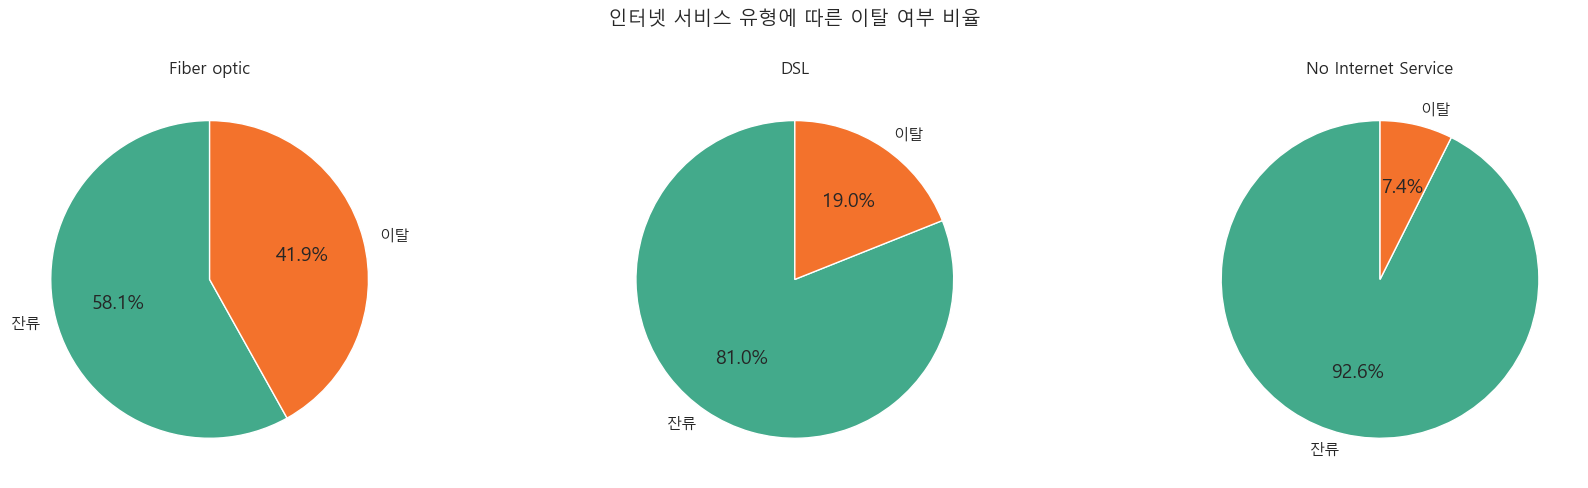

In [25]:
# 교차표 생성
grouped = tel_copy.groupby(['인터넷서비스유형', '이탈여부']).size().unstack()

# 색상
colors = ['#43aa8b', '#f3722c']  # 잔류, 이탈

# subplot으로 파이차트 3개 그리기
plt.figure(figsize=(18, 5))

services = ['Fiber optic', 'DSL', 'No Internet Service']

for i, service in enumerate(services):
    plt.subplot(1, 3, i + 1)
    plt.pie(
        grouped.loc[service],
        labels=['잔류', '이탈'],
        autopct='%.1f%%',
        startangle=90,
        colors=colors
    )
    plt.title(service)
    plt.ylabel('')

plt.suptitle('인터넷 서비스 유형에 따른 이탈 여부 비율', fontsize=14)
plt.tight_layout()
plt.show()

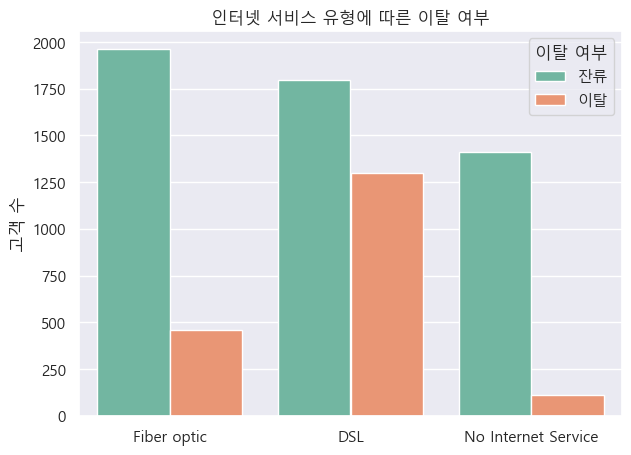

In [26]:
# 인터넷서비스유형에 따른 이탈 비율 (countplot)

plt.figure(figsize=(7,5))

sns.countplot(
    data=tel, 
    x='인터넷서비스유형', 
    hue='이탈여부',
    palette='Set2'
)

plt.title('인터넷 서비스 유형에 따른 이탈 여부')
plt.xticks([0,1,2], ['Fiber optic', 'DSL', 'No Internet Service'])
plt.xlabel('')
plt.ylabel('고객 수')
plt.legend(title='이탈 여부', labels=['잔류','이탈'])
plt.show()

In [126]:
# 인터넷서비스유형별 이탈여부 카운트
summary = (
    tel_copy
    .groupby(['인터넷서비스유형', '이탈여부'])
    .size()
    .reset_index(name='고객수')
)

# 출력
print(summary)

              인터넷서비스유형   이탈여부   고객수
0                  DSL  False  1962
1                  DSL   True   459
2          Fiber optic  False  1799
3          Fiber optic   True  1297
4  No Internet Service  False  1413
5  No Internet Service   True   113


In [27]:
tel_copy['인터넷서비스유형'].value_counts()

인터넷서비스유형
Fiber optic            3096
DSL                    2421
No Internet Service    1526
Name: count, dtype: int64

In [28]:
tel['인터넷서비스유형'].value_counts()

인터넷서비스유형
Fiber optic    3096
DSL            2421
False          1526
Name: count, dtype: int64

In [29]:
print(grouped.index)

Index(['DSL', 'Fiber optic', 'No Internet Service'], dtype='object', name='인터넷서비스유형')


In [30]:
tel['총요금'].value_counts()

총요금
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [31]:
tel.head(10)

,고객ID,성별,고령자여부,배우자여부,부양가족여부,가입개월수,전화서비스가입여부,복수회선여부,인터넷서비스유형,온라인보안서비스여부,...,기술지원서비스여부,TV스트리밍이용여부,영화스트리밍이용여부,계약기간유형,전자청구서이용여부,결제방법,월요금,총요금,이탈여부,인터넷서비스가입여부
0,7590-VHVEG,False,False,True,False,1,False,False,DSL,False,...,False,False,False,Month-to-month,True,Electronic check,29.85,29.85,False,True
1,5575-GNVDE,True,False,False,False,34,True,False,DSL,True,...,False,False,False,One year,False,Mailed check,56.95,1889.5,False,True
2,3668-QPYBK,True,False,False,False,2,True,False,DSL,True,...,False,False,False,Month-to-month,True,Mailed check,53.85,108.15,True,True
3,7795-CFOCW,True,False,False,False,45,False,False,DSL,True,...,True,False,False,One year,False,Bank transfer (automatic),42.30,1840.75,False,True
4,9237-HQITU,False,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,Month-to-month,True,Electronic check,70.70,151.65,True,True
5,9305-CDSKC,False,False,False,False,8,True,True,Fiber optic,False,...,False,True,True,Month-to-month,True,Electronic check,99.65,820.5,True,True
6,1452-KIOVK,True,False,False,True,22,True,True,Fiber optic,False,...,False,True,False,Month-to-month,True,Credit card (automatic),89.10,1949.4,False,True
7,6713-OKOMC,False,False,False,False,10,False,False,DSL,True,...,False,False,False,Month-to-month,False,Mailed check,29.75,301.9,False,True
8,7892-POOKP,False,False,True,False,28,True,True,Fiber optic,False,...,True,True,True,Month-to-month,True,Electronic check,104.80,3046.05,True,True
9,6388-TABGU,True,False,False,True,62,True,False,DSL,True,...,False,False,False,One year,False,Bank transfer (automatic),56.15,3487.95,False,True


In [32]:
tel['총요금'] = tel['총요금'].replace(' ', 0)
tel['총요금'] = tel['총요금'].astype(float)

In [33]:
tel[tel['총요금']== 0]

,고객ID,성별,고령자여부,배우자여부,부양가족여부,가입개월수,전화서비스가입여부,복수회선여부,인터넷서비스유형,온라인보안서비스여부,...,기술지원서비스여부,TV스트리밍이용여부,영화스트리밍이용여부,계약기간유형,전자청구서이용여부,결제방법,월요금,총요금,이탈여부,인터넷서비스가입여부
488,4472-LVYGI,False,False,True,True,0,False,False,DSL,True,...,True,True,False,Two year,True,Bank transfer (automatic),52.55,0.0,False,True
753,3115-CZMZD,True,False,False,True,0,True,False,False,False,...,False,False,False,Two year,False,Mailed check,20.25,0.0,False,False
936,5709-LVOEQ,False,False,True,True,0,True,False,DSL,True,...,False,True,True,Two year,False,Mailed check,80.85,0.0,False,True
1082,4367-NUYAO,True,False,True,True,0,True,True,False,False,...,False,False,False,Two year,False,Mailed check,25.75,0.0,False,False
1340,1371-DWPAZ,False,False,True,True,0,False,False,DSL,True,...,True,True,False,Two year,False,Credit card (automatic),56.05,0.0,False,True
3331,7644-OMVMY,True,False,True,True,0,True,False,False,False,...,False,False,False,Two year,False,Mailed check,19.85,0.0,False,False
3826,3213-VVOLG,True,False,True,True,0,True,True,False,False,...,False,False,False,Two year,False,Mailed check,25.35,0.0,False,False
4380,2520-SGTTA,False,False,True,True,0,True,False,False,False,...,False,False,False,Two year,False,Mailed check,20.00,0.0,False,False
5218,2923-ARZLG,True,False,True,True,0,True,False,False,False,...,False,False,False,One year,True,Mailed check,19.70,0.0,False,False
6670,4075-WKNIU,False,False,True,True,0,True,True,DSL,False,...,True,True,False,Two year,False,Mailed check,73.35,0.0,False,True


In [34]:
tel['개월수*월요금'] = tel['가입개월수'] * tel['월요금']

In [35]:
tel

,고객ID,성별,고령자여부,배우자여부,부양가족여부,가입개월수,전화서비스가입여부,복수회선여부,인터넷서비스유형,온라인보안서비스여부,...,TV스트리밍이용여부,영화스트리밍이용여부,계약기간유형,전자청구서이용여부,결제방법,월요금,총요금,이탈여부,인터넷서비스가입여부,개월수*월요금
0,7590-VHVEG,False,False,True,False,1,False,False,DSL,False,...,False,False,Month-to-month,True,Electronic check,29.85,29.85,False,True,29.85
1,5575-GNVDE,True,False,False,False,34,True,False,DSL,True,...,False,False,One year,False,Mailed check,56.95,1889.50,False,True,1936.30
2,3668-QPYBK,True,False,False,False,2,True,False,DSL,True,...,False,False,Month-to-month,True,Mailed check,53.85,108.15,True,True,107.70
3,7795-CFOCW,True,False,False,False,45,False,False,DSL,True,...,False,False,One year,False,Bank transfer (automatic),42.30,1840.75,False,True,1903.50
4,9237-HQITU,False,False,False,False,2,True,False,Fiber optic,False,...,False,False,Month-to-month,True,Electronic check,70.70,151.65,True,True,141.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,True,False,True,True,24,True,True,DSL,True,...,True,True,One year,True,Mailed check,84.80,1990.50,False,True,2035.20
7039,2234-XADUH,False,False,True,True,72,True,True,Fiber optic,False,...,True,True,One year,True,Credit card (automatic),103.20,7362.90,False,True,7430.40
7040,4801-JZAZL,False,False,True,True,11,False,False,DSL,True,...,False,False,Month-to-month,True,Electronic check,29.60,346.45,False,True,325.60
7041,8361-LTMKD,True,True,True,False,4,True,True,Fiber optic,False,...,False,False,Month-to-month,True,Mailed check,74.40,306.60,True,True,297.60


In [36]:
tel

,고객ID,성별,고령자여부,배우자여부,부양가족여부,가입개월수,전화서비스가입여부,복수회선여부,인터넷서비스유형,온라인보안서비스여부,...,TV스트리밍이용여부,영화스트리밍이용여부,계약기간유형,전자청구서이용여부,결제방법,월요금,총요금,이탈여부,인터넷서비스가입여부,개월수*월요금
0,7590-VHVEG,False,False,True,False,1,False,False,DSL,False,...,False,False,Month-to-month,True,Electronic check,29.85,29.85,False,True,29.85
1,5575-GNVDE,True,False,False,False,34,True,False,DSL,True,...,False,False,One year,False,Mailed check,56.95,1889.50,False,True,1936.30
2,3668-QPYBK,True,False,False,False,2,True,False,DSL,True,...,False,False,Month-to-month,True,Mailed check,53.85,108.15,True,True,107.70
3,7795-CFOCW,True,False,False,False,45,False,False,DSL,True,...,False,False,One year,False,Bank transfer (automatic),42.30,1840.75,False,True,1903.50
4,9237-HQITU,False,False,False,False,2,True,False,Fiber optic,False,...,False,False,Month-to-month,True,Electronic check,70.70,151.65,True,True,141.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,True,False,True,True,24,True,True,DSL,True,...,True,True,One year,True,Mailed check,84.80,1990.50,False,True,2035.20
7039,2234-XADUH,False,False,True,True,72,True,True,Fiber optic,False,...,True,True,One year,True,Credit card (automatic),103.20,7362.90,False,True,7430.40
7040,4801-JZAZL,False,False,True,True,11,False,False,DSL,True,...,False,False,Month-to-month,True,Electronic check,29.60,346.45,False,True,325.60
7041,8361-LTMKD,True,True,True,False,4,True,True,Fiber optic,False,...,False,False,Month-to-month,True,Mailed check,74.40,306.60,True,True,297.60


In [37]:
numeric_df = tel.select_dtypes(include=['number', 'bool'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                  성별     고령자여부     배우자여부    부양가족여부     가입개월수  전화서비스가입여부  \
성별          1.000000 -0.001874 -0.001808  0.010517  0.005106  -0.006488   
고령자여부      -0.001874  1.000000  0.016479 -0.211185  0.016567   0.008576   
배우자여부      -0.001808  0.016479  1.000000  0.452676  0.379697   0.017706   
부양가족여부      0.010517 -0.211185  0.452676  1.000000  0.159712  -0.001762   
가입개월수       0.005106  0.016567  0.379697  0.159712  1.000000   0.008448   
전화서비스가입여부  -0.006488  0.008576  0.017706 -0.001762  0.008448   1.000000   
복수회선여부     -0.008414  0.142948  0.142057 -0.024526  0.331941   0.279690   
온라인보안서비스여부 -0.017021 -0.038653  0.143106  0.080972  0.327203  -0.092893   
온라인백업서비스여부 -0.013773  0.066572  0.141498  0.023671  0.360277  -0.052312   
기기보호서비스여부  -0.002105  0.059428  0.153786  0.013963  0.360653  -0.071227   
기술지원서비스여부  -0.009212 -0.060625  0.119999  0.063268  0.324221  -0.096340   
TV스트리밍이용여부 -0.008393  0.105378  0.124666 -0.016558  0.279756  -0.022574   
영화스트리밍이용여부 -0.010487  0.1

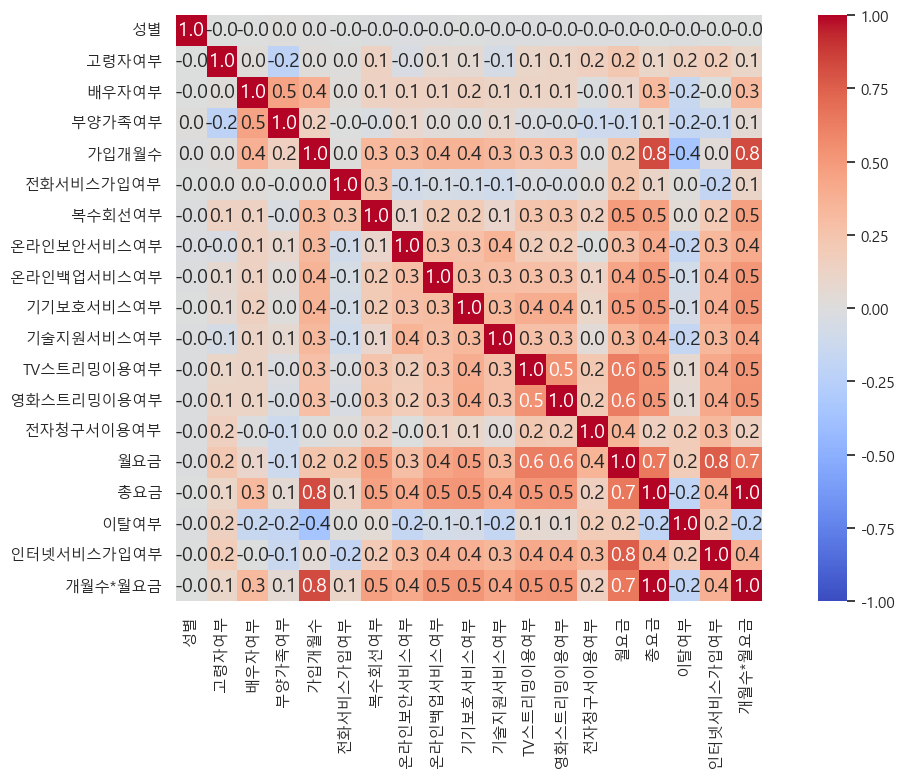

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

In [39]:
numeric_df.columns

Index(['성별', '고령자여부', '배우자여부', '부양가족여부', '가입개월수', '전화서비스가입여부', '복수회선여부',
       '온라인보안서비스여부', '온라인백업서비스여부', '기기보호서비스여부', '기술지원서비스여부', 'TV스트리밍이용여부',
       '영화스트리밍이용여부', '전자청구서이용여부', '월요금', '총요금', '이탈여부', '인터넷서비스가입여부',
       '개월수*월요금'],
      dtype='object')

In [40]:
tel.columns

Index(['고객ID', '성별', '고령자여부', '배우자여부', '부양가족여부', '가입개월수', '전화서비스가입여부',
       '복수회선여부', '인터넷서비스유형', '온라인보안서비스여부', '온라인백업서비스여부', '기기보호서비스여부',
       '기술지원서비스여부', 'TV스트리밍이용여부', '영화스트리밍이용여부', '계약기간유형', '전자청구서이용여부', '결제방법',
       '월요금', '총요금', '이탈여부', '인터넷서비스가입여부', '개월수*월요금'],
      dtype='object')

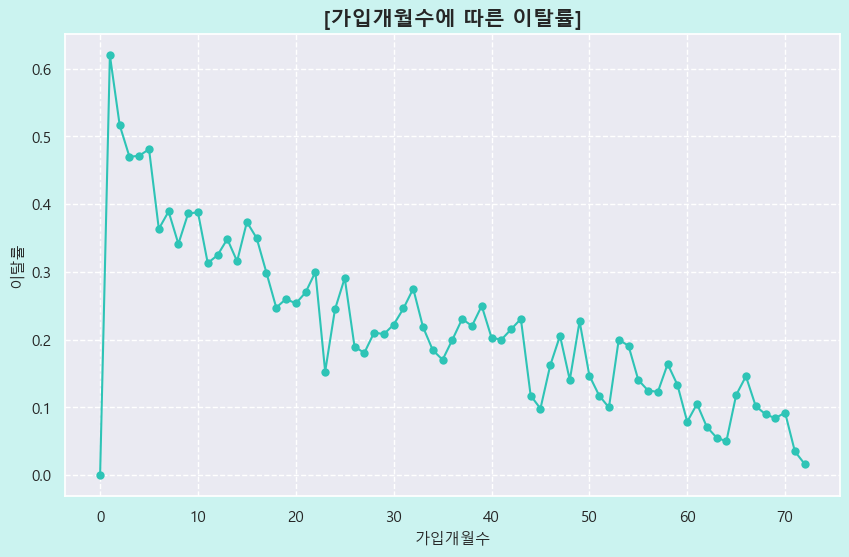

In [41]:
# 가입개월수에 따른 이탈률 (0 ~ 72개월)
# 평균
churn_by_tenure = tel.groupby('가입개월수')['이탈여부'].mean()

# 선 그래프
plt.figure(figsize=(10,6), facecolor='#cbf3f0')
churn_by_tenure.plot(kind='line',
                     color='#2ec4b6',
                     marker='o',
                     markerfacecolor='#2ec4b6',
                     markeredgewidth=0
                    )
plt.title('[가입개월수에 따른 이탈률]', fontsize=15, fontweight='bold')
plt.xlabel('가입개월수', fontsize=11)
plt.ylabel('이탈률', fontsize=11)

plt.grid(True, linestyle='--')
plt.show()

# 이탈한 고객 수 / 가입개월수 별 전체 고객수 => 이탈률

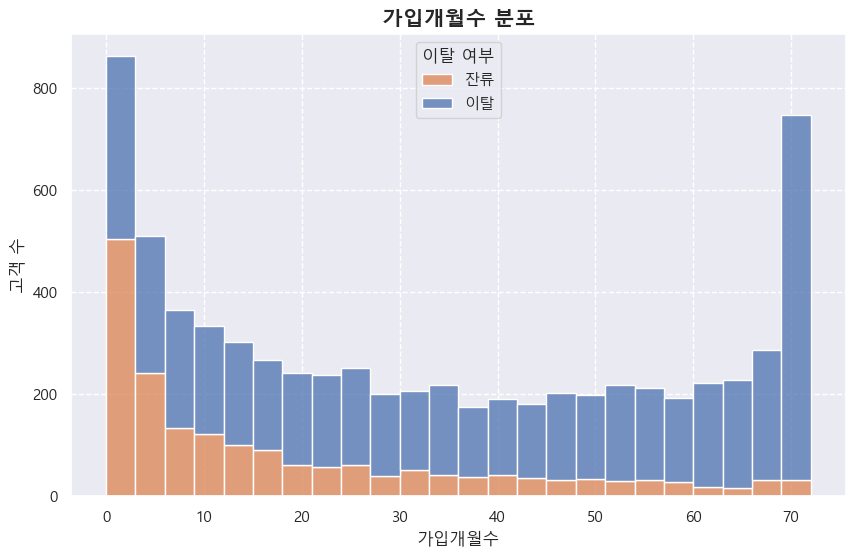

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=tel, x='가입개월수', hue='이탈여부',bins=24, color='pastel', multiple='stack')

plt.title('가입개월수 분포', fontsize=15, fontweight='bold')
plt.xlabel('가입개월수', fontsize=12)
plt.ylabel('고객 수', fontsize=12)
plt.grid(True, linestyle='--')
plt.legend(title='이탈 여부', labels=['잔류','이탈'])
plt.show()

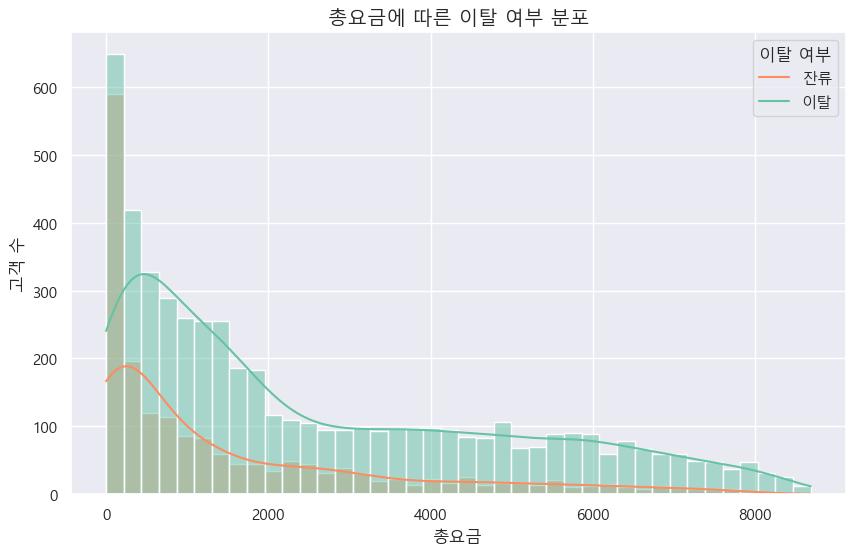

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data=tel, x='총요금', hue='이탈여부', bins=40, kde=True, palette='Set2', alpha=0.5)
plt.title('총요금에 따른 이탈 여부 분포', fontsize=14)
plt.xlabel('총요금')
plt.ylabel('고객 수')
plt.grid(True)
plt.legend(title='이탈 여부', labels=['잔류','이탈'])
plt.show()

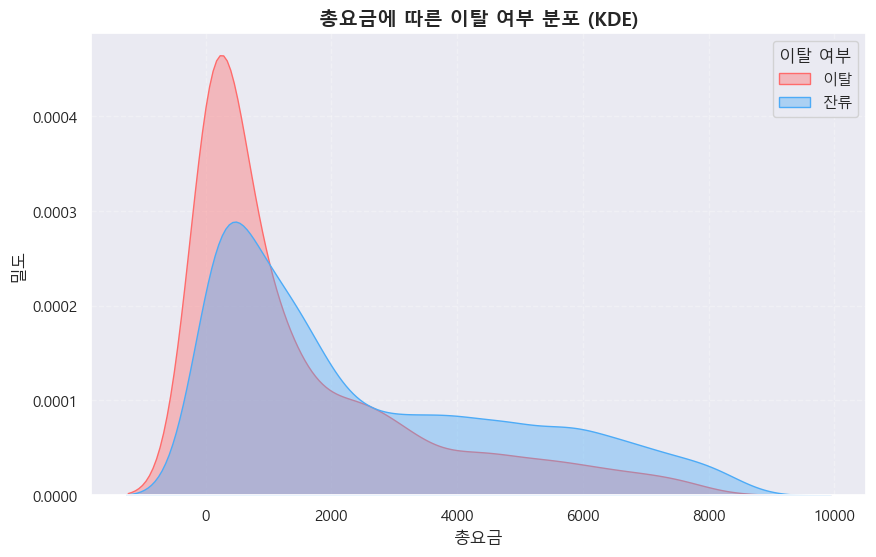

In [44]:
plt.figure(figsize=(10, 6))

# 이탈 고객 (1)
sns.kdeplot(
    data=tel[tel['이탈여부'] == 1],
    x='총요금',
    label='이탈',
    color='#ff6b6b',
    fill=True,
    alpha=0.4
)

# 잔류 고객 (0)
sns.kdeplot(
    data=tel[tel['이탈여부'] == 0],
    x='총요금',
    label='잔류',
    color='#4dabf7',
    fill=True,
    alpha=0.4
)

plt.title('총요금에 따른 이탈 여부 분포 (KDE)', fontsize=14, fontweight='bold')
plt.xlabel('총요금')
plt.ylabel('밀도')
plt.legend(title='이탈 여부')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

C:\Users\win11\AppData\Local\Temp\ipykernel_4544\776508849.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tel, x='이탈여부', y='월요금',palette='Set2')


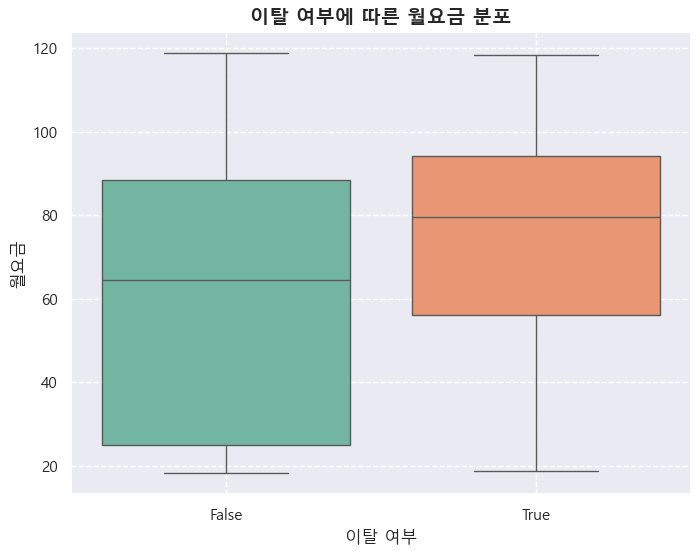

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=tel, x='이탈여부', y='월요금',palette='Set2')
plt.title('이탈 여부에 따른 월요금 분포', fontsize=14, fontweight='bold')
plt.xlabel('이탈 여부')
plt.ylabel('월요금')
plt.grid(True, linestyle='--')
plt.show()

In [46]:
tel['총요금'].max()

8684.8

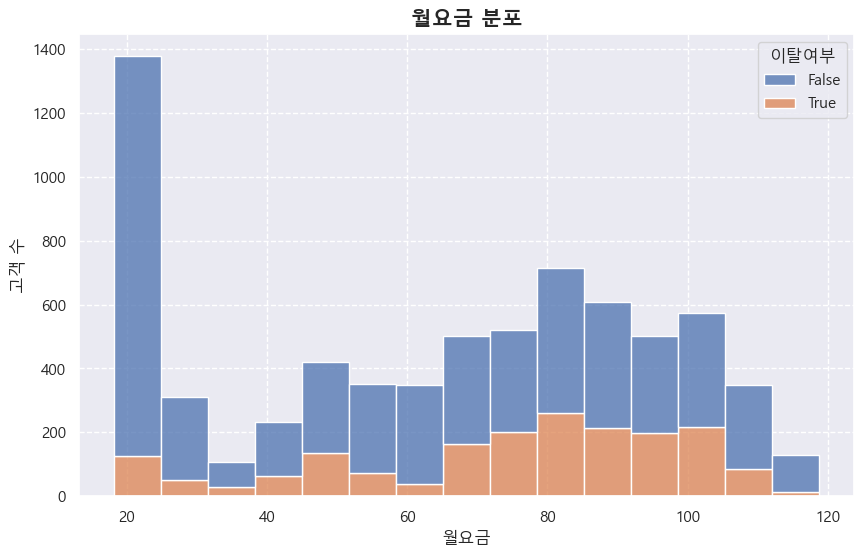

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data=tel, x='월요금', hue='이탈여부',bins=15, color='pastel', multiple='stack')

plt.title('월요금 분포', fontsize=15, fontweight='bold')
plt.xlabel('월요금', fontsize=12)
plt.ylabel('고객 수', fontsize=12)
plt.grid(True, linestyle='--')
plt.show()

In [96]:
tel2 = tel.copy()
tel2

,고객ID,성별,고령자여부,배우자여부,부양가족여부,가입개월수,전화서비스가입여부,복수회선여부,인터넷서비스유형,온라인보안서비스여부,...,TV스트리밍이용여부,영화스트리밍이용여부,계약기간유형,전자청구서이용여부,결제방법,월요금,총요금,이탈여부,인터넷서비스가입여부,개월수*월요금
0,7590-VHVEG,False,False,True,False,1,False,False,DSL,False,...,False,False,Month-to-month,True,Electronic check,29.85,29.85,False,True,29.85
1,5575-GNVDE,True,False,False,False,34,True,False,DSL,True,...,False,False,One year,False,Mailed check,56.95,1889.50,False,True,1936.30
2,3668-QPYBK,True,False,False,False,2,True,False,DSL,True,...,False,False,Month-to-month,True,Mailed check,53.85,108.15,True,True,107.70
3,7795-CFOCW,True,False,False,False,45,False,False,DSL,True,...,False,False,One year,False,Bank transfer (automatic),42.30,1840.75,False,True,1903.50
4,9237-HQITU,False,False,False,False,2,True,False,Fiber optic,False,...,False,False,Month-to-month,True,Electronic check,70.70,151.65,True,True,141.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,True,False,True,True,24,True,True,DSL,True,...,True,True,One year,True,Mailed check,84.80,1990.50,False,True,2035.20
7039,2234-XADUH,False,False,True,True,72,True,True,Fiber optic,False,...,True,True,One year,True,Credit card (automatic),103.20,7362.90,False,True,7430.40
7040,4801-JZAZL,False,False,True,True,11,False,False,DSL,True,...,False,False,Month-to-month,True,Electronic check,29.60,346.45,False,True,325.60
7041,8361-LTMKD,True,True,True,False,4,True,True,Fiber optic,False,...,False,False,Month-to-month,True,Mailed check,74.40,306.60,True,True,297.60


In [100]:
tel2['배우자없음'] = tel2['배우자여부'] == False

In [106]:
tel2[['배우자여부', '배우자없음']]

,배우자여부,배우자없음
0,True,False
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
7038,True,False
7039,True,False
7040,True,False
7041,True,False


In [108]:
numeric_df2 = tel2.select_dtypes(include=['number', 'bool'])
correlation_matrix2 = numeric_df2.corr()
print(correlation_matrix2)

                  성별     고령자여부     배우자여부    부양가족여부     가입개월수  전화서비스가입여부  \
성별          1.000000 -0.001874 -0.001808  0.010517  0.005106  -0.006488   
고령자여부      -0.001874  1.000000  0.016479 -0.211185  0.016567   0.008576   
배우자여부      -0.001808  0.016479  1.000000  0.452676  0.379697   0.017706   
부양가족여부      0.010517 -0.211185  0.452676  1.000000  0.159712  -0.001762   
가입개월수       0.005106  0.016567  0.379697  0.159712  1.000000   0.008448   
전화서비스가입여부  -0.006488  0.008576  0.017706 -0.001762  0.008448   1.000000   
복수회선여부     -0.008414  0.142948  0.142057 -0.024526  0.331941   0.279690   
온라인보안서비스여부 -0.017021 -0.038653  0.143106  0.080972  0.327203  -0.092893   
온라인백업서비스여부 -0.013773  0.066572  0.141498  0.023671  0.360277  -0.052312   
기기보호서비스여부  -0.002105  0.059428  0.153786  0.013963  0.360653  -0.071227   
기술지원서비스여부  -0.009212 -0.060625  0.119999  0.063268  0.324221  -0.096340   
TV스트리밍이용여부 -0.008393  0.105378  0.124666 -0.016558  0.279756  -0.022574   
영화스트리밍이용여부 -0.010487  0.1

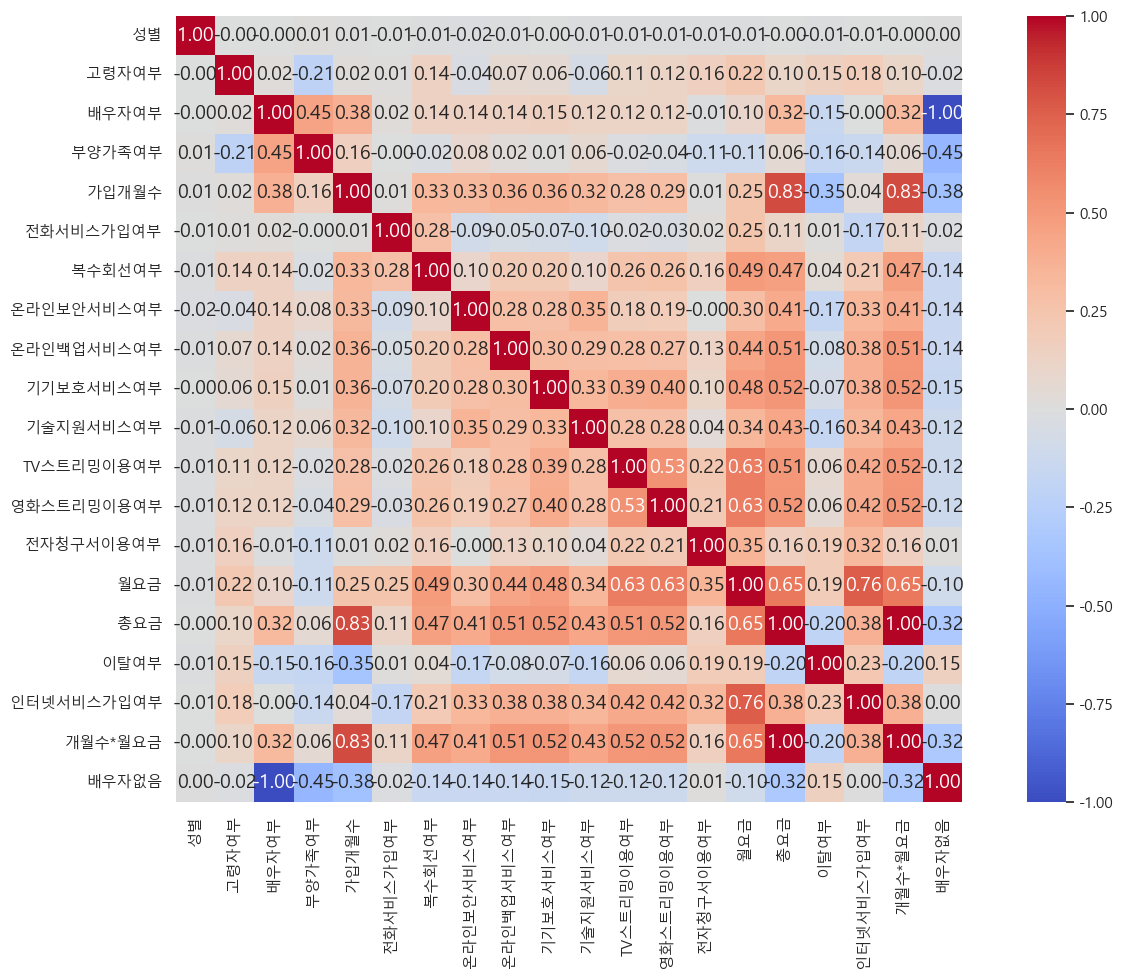

In [114]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()